In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle 
import seaborn as sns

In [18]:
#LOGFILE = "../build/hist.log"
LOGFILE = "../build/kmeans.log"

ordered = []
with open(LOGFILE, "r") as logfile:
    for line in logfile:
        if line[:2] == "do":
            ordered.append(line.split(":"))
#print(ordered)

In [19]:
out = []
stack = []
time = 0
last = ""
for e in ordered:
    if e[0][2] == "-":
        ts = int(e[1])
        if len(stack) != 0:
            out.append((stack[-1][0], time, ts, len(stack)-1))
        stack.append( (e[0].split("-")[1], ts, len(stack)))
        last = "do"
        time = ts
    else:
        label = e[0].split("-")[1]
        ts = int(e[1])
        pop = stack.pop()
        if pop[0] != label:
            print("missmatch!")
            print("Stack:")
            print(stack)
            print("Ordered:")
            print(ordered)
            assert(false)
        out.append((pop[0], time, ts, pop[2]))
        time = ts
        last = "done"

height = 0
min = out[0][1]
max = 0
for o in out:
    if o[3] > height:
        height = o[3]
    if o[1] < min:
        min = o[1]
    if o[2] > max:
        max = o[2]

norm = []
for o in out:
    norm.append((o[0], o[1]-min, o[2]-min, o[3]))

In [10]:
#print(norm)

[('loop', 0, 322000, 0), ('dyn', 322000, 4934000, 1), ('loop', 4934000, 4999000, 0), ('loop', 4999000, 5510000, 1), ('static', 5510000, 5616000, 2), ('loop', 5616000, 5821000, 3), ('static', 5821000, 5975000, 4), ('static', 5975000, 6343000, 5), ('static', 6343000, 6406000, 6), ('static', 6406000, 6488000, 7), ('static', 6488000, 6643000, 6), ('static', 6643000, 6704000, 7), ('syscall', 6704000, 6746000, 8), ('static', 6746000, 6784000, 7), ('static', 6784000, 6828000, 6), ('syscall', 6828000, 6870000, 7), ('static', 6870000, 6909000, 6), ('static', 6909000, 6951000, 5), ('static', 6951000, 6990000, 6), ('static', 6990000, 7028000, 7), ('static', 7028000, 7067000, 6), ('static', 7067000, 7110000, 5), ('static', 7110000, 7183000, 4), ('loop', 7183000, 7250000, 5), ('static', 7250000, 7326000, 6), ('static', 7326000, 7393000, 7), ('loop', 7393000, 7437000, 8), ('dyn', 7437000, 9738000, 9), ('loop', 9738000, 9781000, 8), ('static', 9781000, 9821000, 7), ('loop', 9821000, 9883000, 8), ('st

{'dyn': 0.009529000000000001, 'syscall': 0.031384999999999975, 'static': 345.12877101125446, 'loop': 15.415540000011339}
Total: 360.5852250112658s


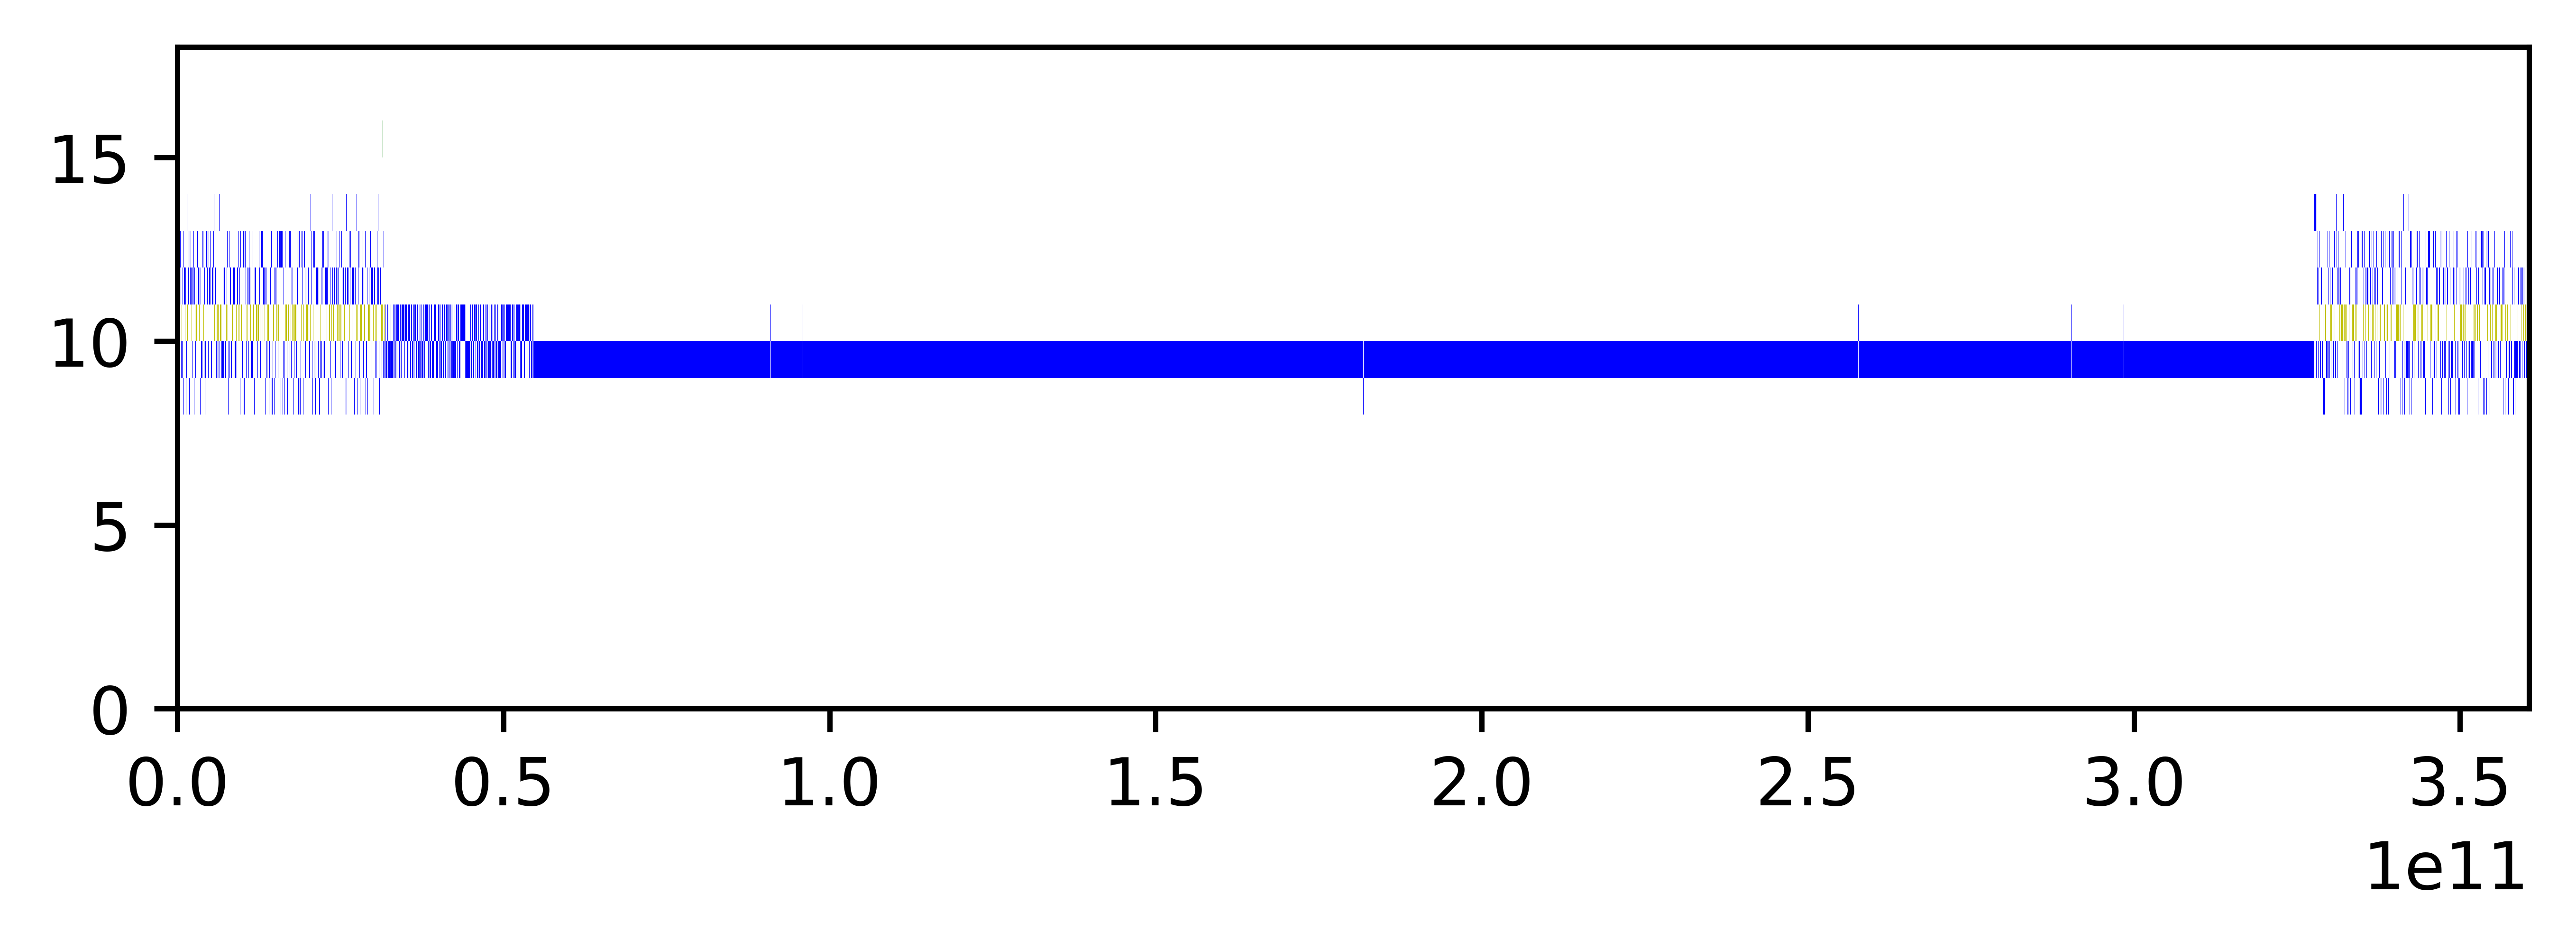

In [20]:
ax = plt.subplot(xlim=(0,max-min), ylim=(0,height))
colors = { "dyn":"r", "syscall":"g", "static":"b", "loop":"y"}
times = { "dyn":0, "syscall":0, "static":0, "loop":0 }

for o in norm:
    ax.add_patch(Rectangle((o[1], o[3]), o[2]-o[1], 1, facecolor=colors[o[0]]))
    times[o[0]] += ((o[2]-o[1])/1000000000.0)

print(times)
sum = 0
for t in times:
    sum = sum+times[t]
print(f"Total: {sum}s")
ax.figure.set_dpi(1000)
ax.set_box_aspect(9/32)